In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

### Preparing Datasets

In [2]:
!wget https://github.com/viswambhar-yasa/Emotion-detection-happy-vs-sad/blob/main/train_happy.h5

--2021-08-26 14:28:36--  https://github.com/viswambhar-yasa/Emotion-detection-happy-vs-sad/blob/main/train_happy.h5
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘train_happy.h5’

train_happy.h5          [ <=>                ] 127.44K  --.-KB/s    in 0.02s   

2021-08-26 14:28:36 (5.48 MB/s) - ‘train_happy.h5’ saved [130502]



In [3]:
!wget https://github.com/viswambhar-yasa/Emotion-detection-happy-vs-sad/blob/main/test_happy.h5

--2021-08-26 14:28:40--  https://github.com/viswambhar-yasa/Emotion-detection-happy-vs-sad/blob/main/test_happy.h5
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘test_happy.h5’

test_happy.h5           [ <=>                ] 122.84K  --.-KB/s    in 0.02s   

2021-08-26 14:28:40 (5.41 MB/s) - ‘test_happy.h5’ saved [125788]



In [4]:
ls 

sample_data/  test_happy.h5  train_happy.h5


In [26]:
train_dataset = h5py.File('./train_happy.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('./test_happy.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

In [27]:
# Normalize image vectors
X_train = train_set_x_orig/255.
X_test = test_set_x_orig/255.

# Reshape
Y_train = train_set_y_orig.T
Y_test = test_set_y_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


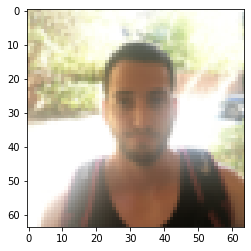

In [28]:
index = 55
plt.imshow(train_set_x_orig[index]) #display sample training image
plt.show()

In [29]:
# GRADED FUNCTION: happyModel

def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            tfl.ZeroPadding2D(padding=(3,3),input_shape = (64, 64, 3)),
            tfl.Conv2D(32,kernel_size=(7,7),strides=(1,1)),
            tfl.BatchNormalization(axis=3),
            tfl.ReLU(),
            tfl.MaxPool2D(),
            tfl.Flatten(),
            tfl.Dense(1,activation='sigmoid')
        ])
    
    return model

In [30]:
happy_model = happyModel()
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [31]:
happy_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [24]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 5s 105ms/step - loss: 1.3082 - accuracy: 0.6583
Epoch 2/10
38/38 [==============================] - 4s 117ms/step - loss: 0.2343 - accuracy: 0.9050
Epoch 3/10
38/38 [==============================] - 4s 113ms/step - loss: 0.2429 - accuracy: 0.9083
Epoch 4/10
38/38 [==============================] - 4s 117ms/step - loss: 0.2205 - accuracy: 0.9150
Epoch 5/10
38/38 [==============================] - 4s 110ms/step - loss: 0.1144 - accuracy: 0.9533
Epoch 6/10
38/38 [==============================] - 4s 107ms/step - loss: 0.1080 - accuracy: 0.9583
Epoch 7/10
38/38 [==============================] - 4s 107ms/step - loss: 0.1063 - accuracy: 0.9633
Epoch 8/10
38/38 [==============================] - 4s 112ms/step - loss: 0.0789 - accuracy: 0.9700
Epoch 9/10
38/38 [==============================] - 4s 107ms/step - loss: 0.0802 - accuracy: 0.9633
Epoch 10/10
38/38 [==============================] - 4s 102ms/step - loss: 0.1351 - accuracy: 0.9567

In [53]:
x_predicted=happy_model.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(np.round(x_predicted),Y_test)
cm

array([[66, 84],
       [ 0,  0]])